In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
import pickle

In [94]:
# load data - pickle files
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    validation = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [95]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [96]:
x_train = train['features']
y_train = train['labels']

In [97]:
x_validation = validation['features']
y_validation = validation['labels']

In [98]:
x_test = test['features']
y_test = test['labels']

In [99]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_validation.shape, y_validation.shape

((34799, 32, 32, 3),
 (34799,),
 (12630, 32, 32, 3),
 (12630,),
 (4410, 32, 32, 3),
 (4410,))

41

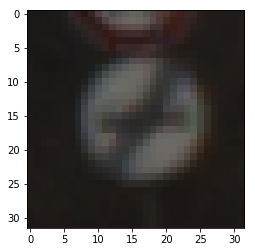

In [100]:
plt.imshow(x_train[1])
y_train[1]

In [101]:
y_train, y_validation, y_test

(array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 array([16,  1, 38, ...,  6,  7, 10], dtype=uint8))

In [102]:
#values in training set are arranged in order - need to shuffle them before building model

In [103]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [104]:
y_train

array([25,  2,  2, ...,  9,  7, 23], dtype=uint8)

In [105]:
x_train.shape

(34799, 32, 32, 3)

In [106]:
# convert images to grayscale
x_train_gray = np.sum(x_train/3, axis= 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

In [107]:
# normalise images
x_train_gray_norm = (x_train_gray - 128)/128 
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [108]:
x_train_gray.shape

(34799, 32, 32, 1)

In [109]:
x_train_gray[1].shape

(32, 32, 1)

In [110]:
x_train_gray[1].squeeze().shape

(32, 32)

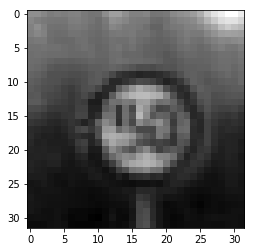

In [111]:
plt.imshow(x_train_gray[1].squeeze(), cmap = 'gray') # squeeze() - will remove 1-D entries from the np array

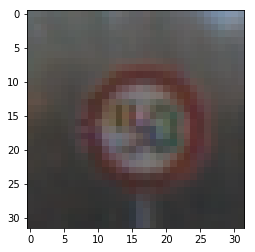

In [112]:
plt.imshow(x_train[1]) # original coloured image

In [113]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [114]:
image_shape = x_train_gray[45].shape
image_shape

(32, 32, 1)

In [115]:
# implemented LE NET architecture in keras

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [116]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [117]:
history = cnn_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 22s 644us/step - loss: 3.2259 - acc: 0.1683 - val_loss: 2.8085 - val_acc: 0.2608
Epoch 2/50
34799/34799 [==============================] - 23s 654us/step - loss: 1.8067 - acc: 0.4996 - val_loss: 1.4812 - val_acc: 0.5819
Epoch 3/50
34799/34799 [==============================] - 21s 595us/step - loss: 1.0088 - acc: 0.7173 - val_loss: 1.0514 - val_acc: 0.6853
Epoch 4/50
34799/34799 [==============================] - 20s 580us/step - loss: 0.7220 - acc: 0.7982 - val_loss: 0.8738 - val_acc: 0.7458
Epoch 5/50
34799/34799 [==============================] - 23s 662us/step - loss: 0.5739 - acc: 0.8425 - val_loss: 0.7890 - val_acc: 0.7637
Epoch 6/50
34799/34799 [==============================] - 20s 587us/step - loss: 0.4686 - acc: 0.8754 - val_loss: 0.7347 - val_acc: 0.7882
Epoch 7/50
34799/34799 [==============================] - 20s 589us/step - loss: 0.3989 - acc: 0.8961 - val_loss: 0.7

In [118]:
# save model
from keras.models import load_model
cnn_model.save("cnn_model_traffic_sign_classification.h5")

In [119]:
# load saved model
cnn_model = load_model("cnn_model_traffic_sign_classification.h5")

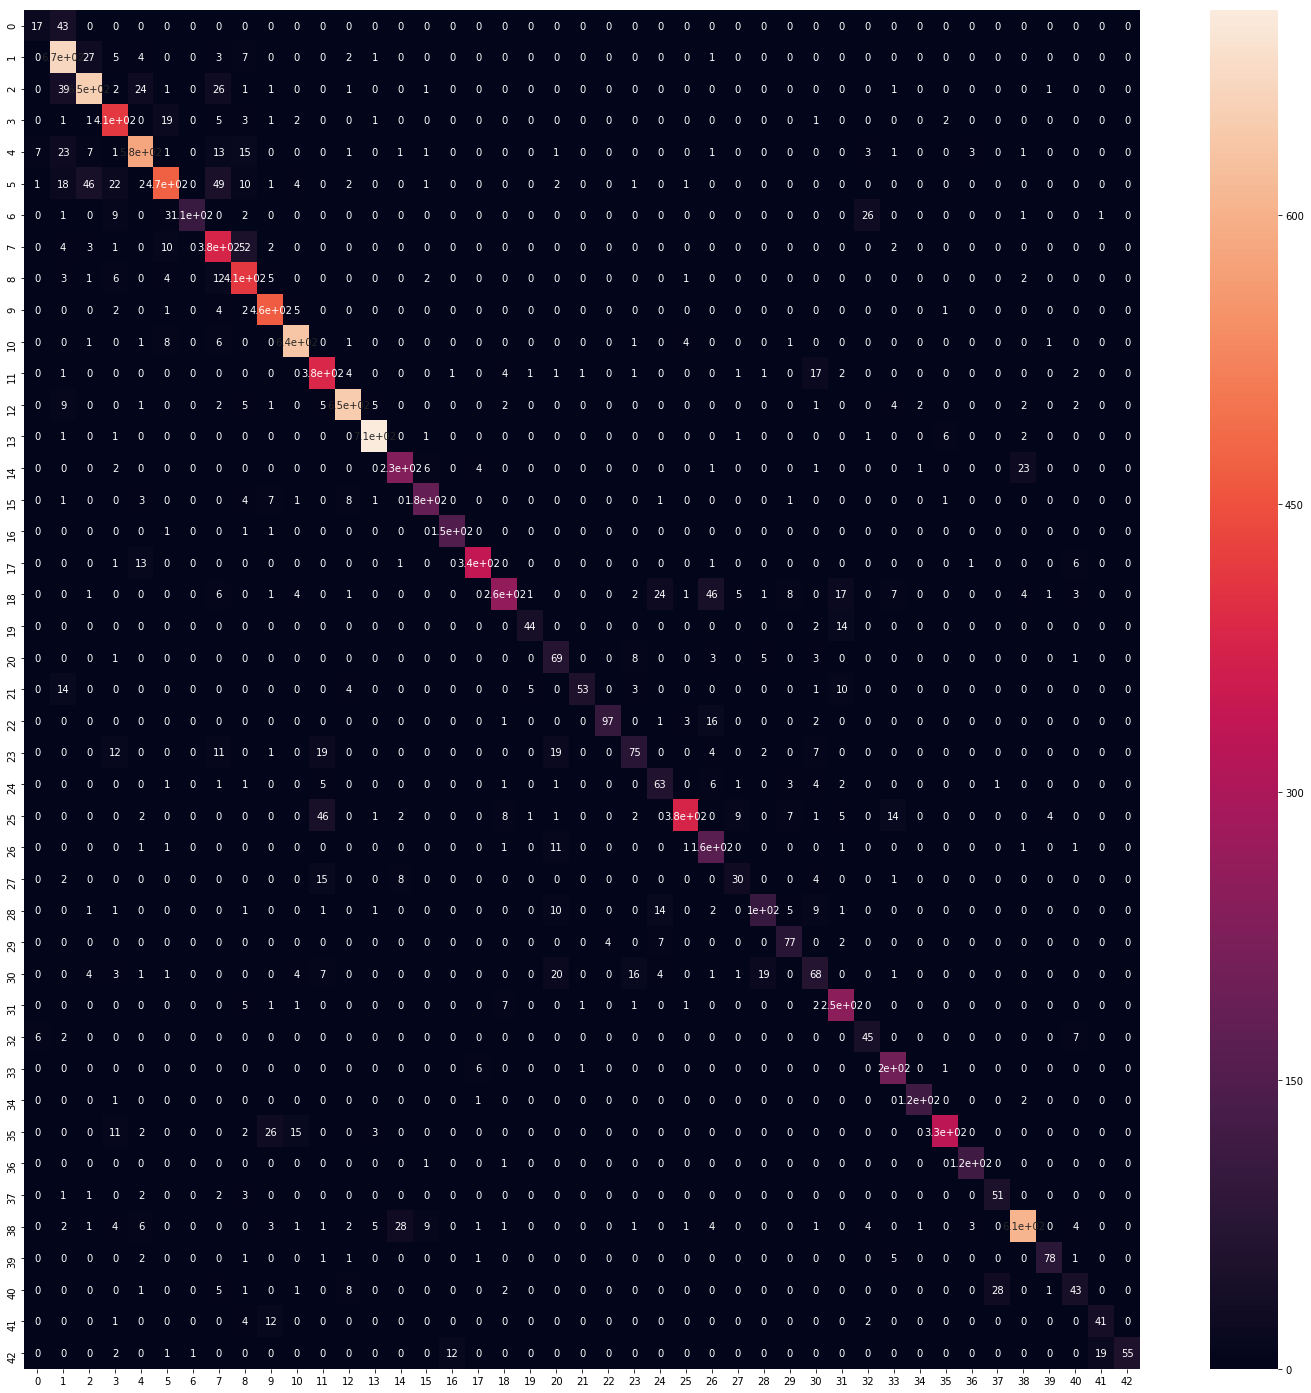

In [120]:
from sklearn.metrics import confusion_matrix
y_pred = cnn_model.predict_classes(x_test_gray_norm)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

In [121]:
# calculate score
score = cnn_model.evaluate(x_test_gray_norm, y_test,verbose=0)
score

[1.0784626182357493, 0.8592240696376218]

TEST ACCURACY comes out to be : 85.92%

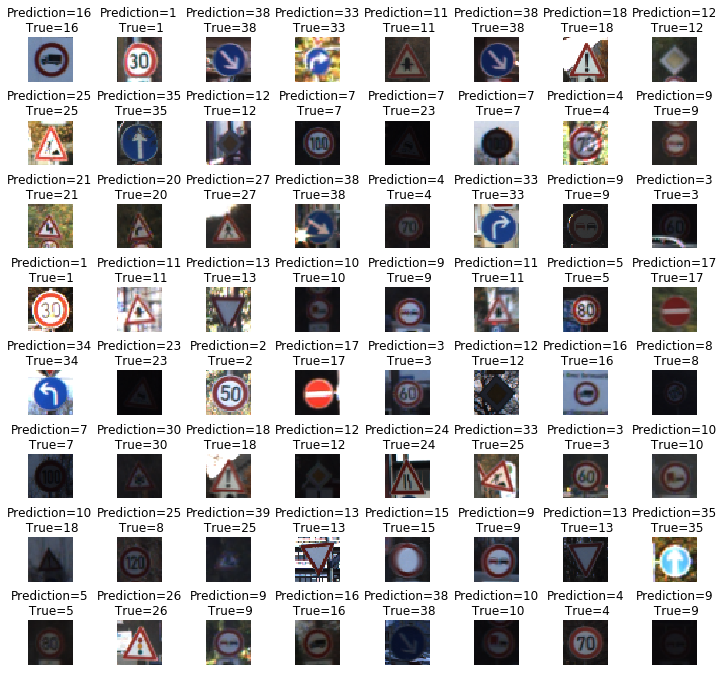

In [127]:
# visualise results
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [123]:
# end